# Numerical Simulation Laboratory

## Numerical exercise 4 
La cartella contiene i vari files organizzati nelle seguenti cartelle:
- <font color='red'>**Code**</font>: contiene il codice relativo alla simulazione della dinamica molecolare compilabile attraverso il comando *make MolDyn_NVE.exe*.
- **<font color='red'>Files</font>**: contiene i files di output suddivisi per le tre simulazioni dell'Argon: solido, liquido e gassoso.
- **<font color='red'>Pictures</font>**: contiene immagini e gifs riportate nel notebook.

Il codice è stato organizzato nel seguente modo:
- <font color='red'>*MolDyn_NVE.cpp*</font> codice relativo alla simulazione della dinamica molecolare.
- <font color='red'>*statistics.cpp*</font> codice contenente funzioni per il calcolo delle medie progressive.

### Exercise 04.1 - 04.2

I seguenti risultati mostrano la prima parte della simulazione necessaria per equilibrare il sistema in modo da ottenere delle configurazioni di partenza in cui la temperatura oscilla intorno al valore desiderato.
Per raggiungere questo scopo ho riavviato 10 volte la simulazione dell'Argon liquido e solido e 15 volte quella della fase gassosa, facendola ripartire ogni volta dalle ultime due configurazioni della simulazione precedente. In particolare, per ciascuna delle tre fasi, ho utilizzato $nstep=10000$ ad ogni riavvio e ho misurato la temperatura e l'energia istantanee del sistema ogni $10$ step.

Le configurazioni finali ottenute tramite questi procedimenti sono state salvate nella cartella *configurations* in modo da poter riprodurre le successive simulazioni dallo stesso punto di partenza.

<font color='blue'>**Fase solida**</font>: equilibro il sistema finchè la temperatura desiderata in unità ridotte oscilla intorno al valore $T^\star = 0.8$. I grafici qui riportati mostrano temperatura ed energia totale istantanee ottenute durante i $10$ riavvii successivi. Le grandezze sono mostrate in unità ridotte.

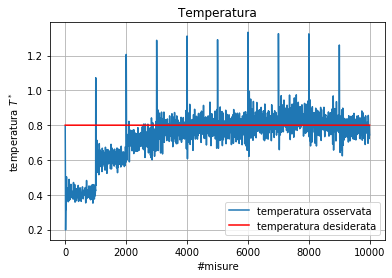

In [119]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alla prima parte della simulazione per l'Argon solido
temp= np.loadtxt('Files/solid/temp.out', delimiter = '  ', unpack = 'True')

N=10000
x=np.linspace(0,N,N)

plt.xlabel('#misure')
plt.ylabel('temperatura $T^*$')
t=0.8*x**0

plt.plot(x, temp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, t, color='red', label='temperatura desiderata')  #temperatura desiderata
plt.title('Temperatura')
plt.legend()
plt.grid(True)

Come è possibile osservare, dopo circa 4 riavvii, la temperatura comincia ad oscillare intorno alla temperatura target della simulazione e l'andamento prosegue allo stesso modo per tutti i 10 riavvi. Ciò ci permette di considerare il sistema all'equilibrio ed è possibile utilizzare le configurazioni ottenute al termine di questa fase per far partire la simulazione vera e propria.

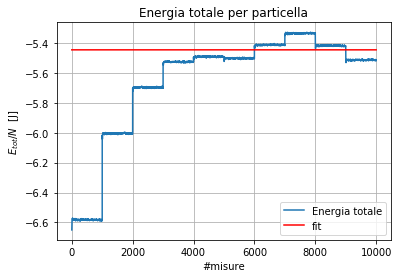

In [151]:
import array as arr
from scipy.optimize import curve_fit

etot= np.loadtxt('Files/solid/etot.out', delimiter = '  ', unpack = 'True')

#fitto l'andamento dell'energia per gli step da 4000 a 10000
N=4000
Efit = arr.array('d', [])
for i in range(10000-N):
    Efit.append( etot[N+i] )
    
y = np.linspace(N,10000, 10000-N)

#retta orizzontale con cui fittare l'andamento
def func(x, k):
    return k*(x**0)

popt, pcov = curve_fit( func, y, Efit )  #fit  per ottenere un valore approssimato dell'energia

plt.plot(x, etot, label='Energia totale')  #energia totale
plt.plot(x, func(x, *popt), color='red', label='fit')  #fit della funzione 

plt.title('Energia totale per particella')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#misure')
plt.legend()
plt.grid(True)
plt.show()

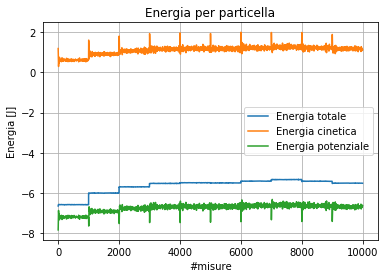

In [94]:
ekin= np.loadtxt('Files/solid/ekin.out', delimiter = '  ', unpack = 'True')
epot= np.loadtxt('Files/solid/epot.out', delimiter = '  ', unpack = 'True')
etot= np.loadtxt('Files/solid/etot.out', delimiter = '  ', unpack = 'True')

plt.xlabel('#misure')
plt.ylabel('Energia [J]')

plt.plot(x, etot, label='Energia totale')  #energia totale osservata
plt.plot(x, ekin, label='Energia cinetica')  #energia cinetica osservata
plt.plot(x, epot, label='Energia potenziale')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

I grafici sopra riportati mostrano l'andamento dell'energia istantanea durante i 10 riavvii della simulazione. Come è possibile osservare, l'energia totale non è esattamente costante anche se dopo diversi riavvii tende a fluttuare in un intervallo più limitato rispetto alle oscillazioni mostrate durante i primi riavvii. 
In particolare è mostrato il confronto ottenuto con un fit dei dati effettuato solo sui valori dell'energia totale successivi al quarto rilancio. Il valore approssimato per l'energia totale così ottenuto in unità ridotte è pari a $E_{tot} = -5.444$.

<font color='blue'>**Fase liquida**</font>: equilibro il sistema finchè la temperatura desiderata in unità ridotte oscilla intorno al valore $T^\star = 1.1$. I grafici qui riportati mostrano temperatura ed energia totale istantanee ottenute durante i $10$ riavvii successivi. Le grandezze sono mostrate in unità ridotte.

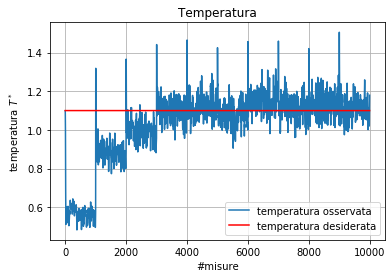

In [154]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alla prima parte della simulazione per l'Argon liquido
temp= np.loadtxt('Files/liquid/temp.out', delimiter = '  ', unpack = 'True')

N=10000
x=np.linspace(0,N,N)

plt.xlabel('#misure')
plt.ylabel('temperatura $T^*$')
t=1.1*x**0

plt.plot(x, temp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, t, color='red', label='temperatura desiderata')  #temperatura desiderata
plt.title('Temperatura')
plt.legend()
plt.grid(True)

Come è possibile osservare, dopo circa 4 riavvii, la temperatura comincia ad oscillare intorno alla temperatura target della simulazione e l'andamento prosegue allo stesso modo per tutti i 10 riavvi. Ciò ci permette di considerare il sistema all'equilibrio ed è possibile utilizzare le configurazioni ottenute al termine di questa fase per far partire la simulazione vera e propria.

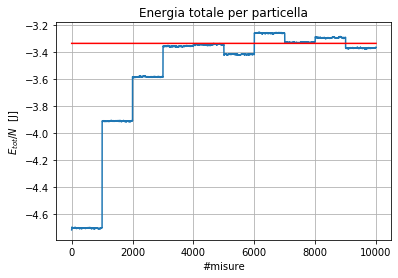

In [159]:
etot= np.loadtxt('Files/liquid/etot.out', delimiter = '  ', unpack = 'True')

#fitto l'andamento dell'energia per gli step da 4000 a 10000
N=4000
Efit = arr.array('d', [])
for i in range(10000-N):
    Efit.append( etot[N+i] )
    
y = np.linspace(N,10000, 10000-N)

#retta orizzontale con cui fittare l'andamento
def func(x, k):
    return k*(x**0)

popt, pcov = curve_fit( func, y, Efit )  #fit  per ottenere un valore approssimato dell'energia

plt.plot(x, etot, label='Energia totale')  #energia totale
plt.plot(x, func(x, *popt), color='red', label='fit')  #fit della funzione 

plt.title('Energia totale per particella')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#misure')
plt.grid(True)
plt.show()

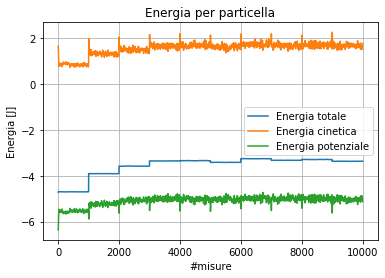

In [156]:
ekin= np.loadtxt('Files/liquid/ekin.out', delimiter = '  ', unpack = 'True')
epot= np.loadtxt('Files/liquid/epot.out', delimiter = '  ', unpack = 'True')
etot= np.loadtxt('Files/liquid/etot.out', delimiter = '  ', unpack = 'True')

plt.xlabel('#misure')
plt.ylabel('Energia [J]')

plt.plot(x, etot, label='Energia totale')  #energia totale osservata
plt.plot(x, ekin, label='Energia cinetica')  #energia cinetica osservata
plt.plot(x, epot, label='Energia potenziale')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

I grafici sopra riportati mostrano l'andamento dell'energia istantanea durante i 10 riavvii della simulazione. Come è possibile osservare, l'energia totale non è esattamente costante anche se dopo diversi riavvii tende a fluttuare in un intervallo più limitato rispetto alle oscillazioni mostrate durante i primi riavvii. 
In particolare è mostrato il confronto ottenuto con un fit dei dati effettuato solo sui valori dell'energia totale successivi al quarto rilancio. Il valore approssimato per l'energia totale così ottenuto in unità ridotte è pari a $E_{tot} = -3.334$.

<font color='blue'>**Fase gassosa**</font>: equilibro il sistema finchè la temperatura desiderata in unità ridotte oscilla intorno al valore $T^\star = 1.2$. I grafici qui riportati mostrano temperatura ed energia totale istantanee ottenute durante i $10$ riavvii successivi. Le grandezze sono mostrate in unità ridotte.

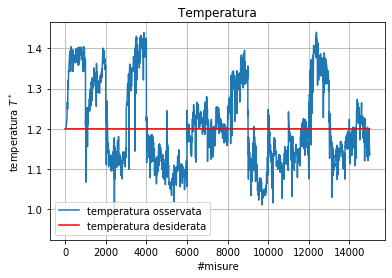

In [161]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alla prima parte della simulazione per l'Argon gassoso
temp= np.loadtxt('Files/gas/temp.out', delimiter = '  ', unpack = 'True')

N=15000
x=np.linspace(0,N,N)

plt.xlabel('#misure')
plt.ylabel('temperatura $T^*$')
t=1.2*x**0

plt.plot(x, temp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, t, color='red', label='temperatura desiderata')  #temperatura desiderata
plt.title('Temperatura')
plt.legend()
plt.grid(True)

Come è possibile osservare, l'andamento della temperatura per la fase gassosa è qualitativamente diverso rispetto alle altre due fasi. Infatti è evidente un'oscillazione di ampiezza maggiore che non diminuisce nonostante la simulazione sia stata riavviata 15 volte invece che 10. In ogni caso possiamo considerare la fase equilibrata in quanto la temperatura oscilla intorno al valore target.

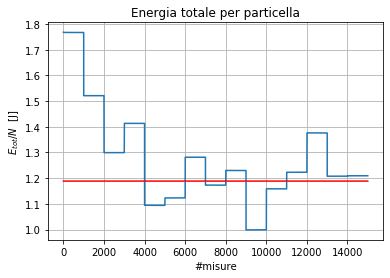

In [168]:
etot= np.loadtxt('Files/gas/etot.out', delimiter = '  ', unpack = 'True')

#fitto l'andamento dell'energia per gli step da 4000 a 10000
N=4000
Efit = arr.array('d', [])
for i in range(15000-N):
    Efit.append( etot[N+i] )
    
y = np.linspace(N,15000, 15000-N)

#retta orizzontale con cui fittare l'andamento
def func(x, k):
    return k*(x**0)

popt, pcov = curve_fit( func, y, Efit )  #fit  per ottenere un valore approssimato dell'energia

plt.plot(x, etot, label='Energia totale')  #energia totale
plt.plot(x, func(x, *popt), color='red', label='fit')  #fit della funzione 

plt.title('Energia totale per particella')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#misure')
plt.grid(True)
plt.show()

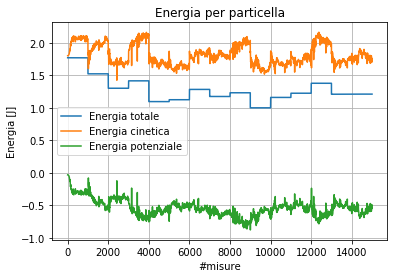

In [163]:
ekin= np.loadtxt('Files/gas/ekin.out', delimiter = '  ', unpack = 'True')
epot= np.loadtxt('Files/gas/epot.out', delimiter = '  ', unpack = 'True')
etot= np.loadtxt('Files/gas/etot.out', delimiter = '  ', unpack = 'True')

plt.xlabel('#misure')
plt.ylabel('Energia [J]')

plt.plot(x, etot, label='Energia totale')  #energia totale osservata
plt.plot(x, ekin, label='Energia cinetica')  #energia cinetica osservata
plt.plot(x, epot, label='Energia potenziale')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

I grafici sopra riportati mostrano l'andamento dell'energia istantanea durante i 15 riavvii della simulazione. Anche in questo caso l'energia totale presenta maggiori oscillazioni rispetto alle due fasi precedenti. Effettuando un fit dei dati con una retta orizzontale per i valori successivi al quarto riavvio possiamo ricavare un valore approssimato per l'energia totale della fase gassosa che in unità ridotte risulta pari a $E_{tot} = 1.889$.

### Exercise 04.3

I valori medi ottenuti per le tre fasi, con le rispettive incertezze statistiche, sono qui riportati in unità SI utilizzando per la conversione delle unità ridotte i seguenti valori $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

In [101]:
sigma = 0.34 * 10**-9  #unità di lunghezza in metri
epsilon = 1.380649 * 10**-23  #unità di energia in Joule
m = 39.948*1.6605* 10**27  #unità di massa in Kg
t = 120  #unità di temperatura in K

1. <font color='blue'>**Fase solida**</font>
<img src="Pictures/solid.gif"  width="500">

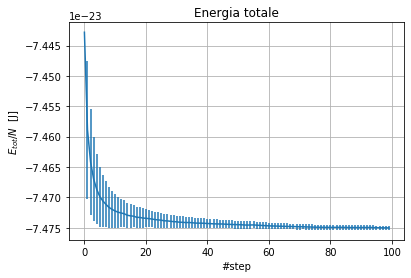

In [102]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alle medie cumulative per l'Argon solido
x, temp, errtemp= np.loadtxt('Files/solid/ave_temp.out', delimiter = '  ', unpack = 'True')
x, ekin, errekin= np.loadtxt('Files/solid/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/solid/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/solid/ave_etot.out', delimiter = '  ', unpack = 'True')

#conversione in unità SI
temp *= t
errtemp *= t
ekin *= epsilon
errekin *= epsilon
epot *= epsilon
errepot *= epsilon
etot *= epsilon
erretot *= epsilon

#Grafico energia totale per particella
plt.errorbar(x, etot, yerr=erretot)
plt.title('Energia totale')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

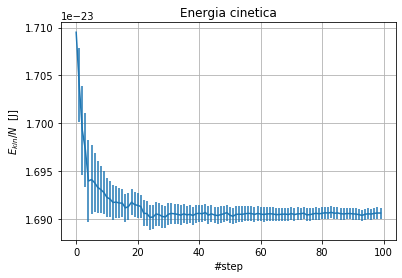

In [103]:
#Grafico energia cinetica per particella
plt.errorbar(x, ekin, yerr=errekin)
plt.title('Energia cinetica')
plt.ylabel('$E_{kin}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

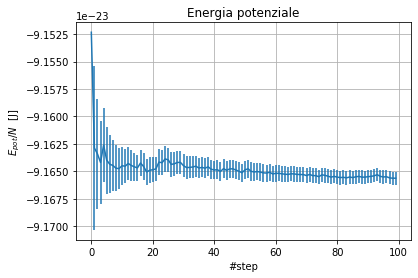

In [104]:
#Grafico energia potenziale per particella
plt.errorbar(x, epot, yerr=errepot)
plt.title('Energia potenziale')
plt.ylabel('$E_{pot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

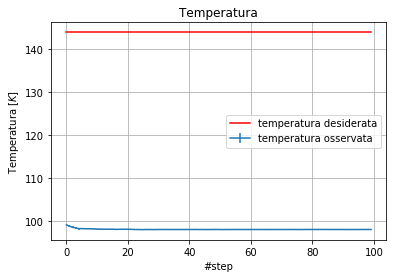

In [105]:
Tsi=t*1.2*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#step')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.legend()
plt.grid(True)

2. <font color='blue'>**Fase liquida**</font>
<img src="Pictures/liquid.gif"  width="450">

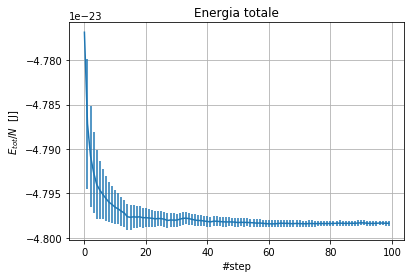

In [106]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alle medie cumulative per l'Argon solido
x, temp, errtemp= np.loadtxt('Files/liquid/ave_temp.out', delimiter = '  ', unpack = 'True')
x, ekin, errekin= np.loadtxt('Files/liquid/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/liquid/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/liquid/ave_etot.out', delimiter = '  ', unpack = 'True')

#conversione in unità SI
temp *= t
errtemp *= t
ekin *= epsilon
errekin *= epsilon
epot *= epsilon
errepot *= epsilon
etot *= epsilon
erretot *= epsilon

#Grafico energia totale per particella
plt.errorbar(x, etot, yerr=erretot)
plt.title('Energia totale')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

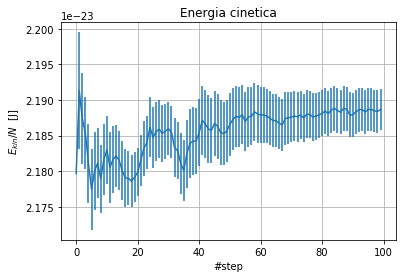

In [107]:
#Grafico energia cinetica per particella
plt.errorbar(x, ekin, yerr=errekin)
plt.title('Energia cinetica')
plt.ylabel('$E_{kin}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

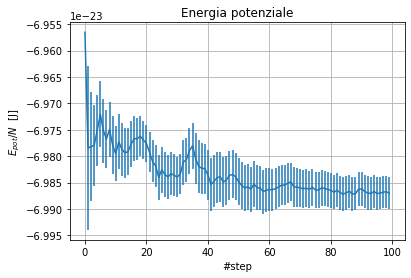

In [108]:
#Grafico energia potenziale per particella
plt.errorbar(x, epot, yerr=errepot)
plt.title('Energia potenziale')
plt.ylabel('$E_{pot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

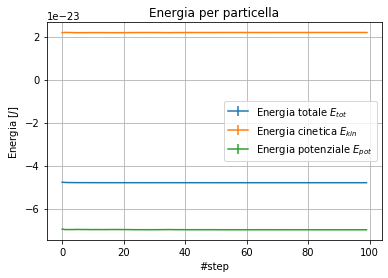

In [109]:
plt.xlabel('#step')
plt.ylabel('Energia $[J]$')

plt.errorbar(x, etot, yerr=erretot, label='Energia totale $E_{tot}$')  #energia totale osservata
plt.errorbar(x, ekin, yerr=errekin, label='Energia cinetica $E_{kin}$')  #energia cinetica osservata
plt.errorbar(x, epot, yerr=errepot, label='Energia potenziale $E_{pot}$')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

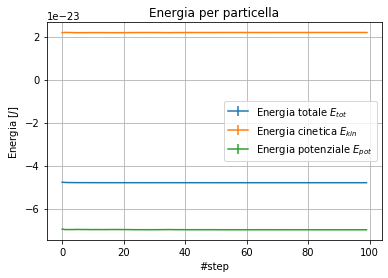

In [110]:
plt.xlabel('#step')
plt.ylabel('Energia $[J]$')

plt.errorbar(x, etot, yerr=erretot, label='Energia totale $E_{tot}$')  #energia totale osservata
plt.errorbar(x, ekin, yerr=errekin, label='Energia cinetica $E_{kin}$')  #energia cinetica osservata
plt.errorbar(x, epot, yerr=errepot, label='Energia potenziale $E_{pot}$')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

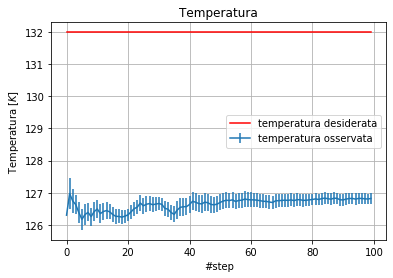

In [111]:
Tsi=t*1.1*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#step')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.legend()
plt.grid(True)

3. <font color='blue'>**Fase gassosa**</font>
<img src="Pictures/gas.gif"  width="450">

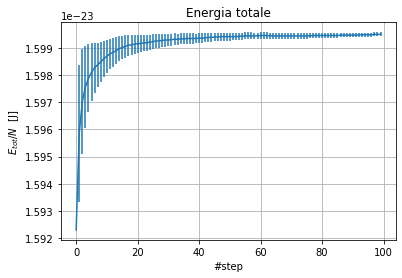

In [112]:
import math
import numpy as np
import matplotlib.pyplot as plt

#importo i dati relativi alle medie cumulative per l'Argon solido
x, temp, errtemp= np.loadtxt('Files/gas/ave_temp.out', delimiter = '  ', unpack = 'True')
x, ekin, errekin= np.loadtxt('Files/gas/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/gas/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/gas/ave_etot.out', delimiter = '  ', unpack = 'True')

#conversione in unità SI
temp *= t
errtemp *= t
ekin *= epsilon
errekin *= epsilon
epot *= epsilon
errepot *= epsilon
etot *= epsilon
erretot *= epsilon

#Grafico energia totale per particella
plt.errorbar(x, etot, yerr=erretot)
plt.title('Energia totale')
plt.ylabel('$E_{tot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

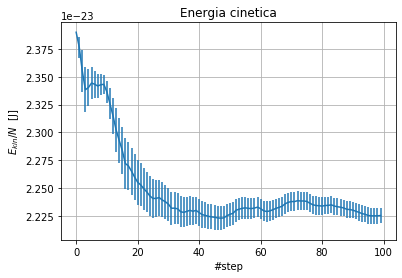

In [113]:
#Grafico energia cinetica per particella
plt.errorbar(x, ekin, yerr=errekin)
plt.title('Energia cinetica')
plt.ylabel('$E_{kin}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

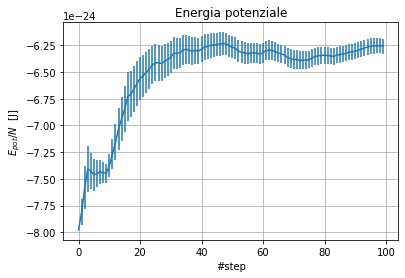

In [114]:
#Grafico energia potenziale per particella
plt.errorbar(x, epot, yerr=errepot)
plt.title('Energia potenziale')
plt.ylabel('$E_{pot}/N$  [J]')
plt.xlabel('#step')
plt.grid(True)

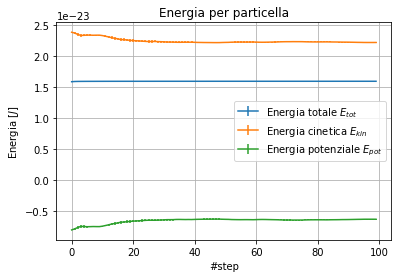

In [115]:
plt.xlabel('#step')
plt.ylabel('Energia $[J]$')

plt.errorbar(x, etot, yerr=erretot, label='Energia totale $E_{tot}$')  #energia totale osservata
plt.errorbar(x, ekin, yerr=errekin, label='Energia cinetica $E_{kin}$')  #energia cinetica osservata
plt.errorbar(x, epot, yerr=errepot, label='Energia potenziale $E_{pot}$')  #energia potenziale osservata
plt.title('Energia per particella')
plt.legend()
plt.grid(True)

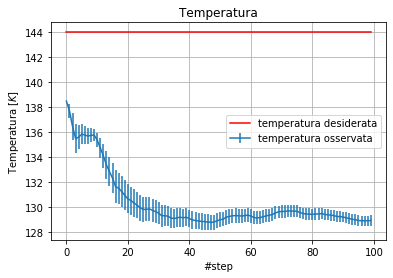

In [116]:
Tsi=t*1.2*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura osservata')  #temperatura osservata
plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#step')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.legend()
plt.grid(True)

### Exercise 04.3